In [35]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import warnings
import scipy
from astropy_healpix import HEALPix
from pylab import imshow
from matplotlib import colorbar
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
#warnings.filterwarnings("ignore")
from scipy import interpolate
from scipy.interpolate import interp2d

In [37]:
plt.figure(figsize=[12, 8])
hitmap = hp.read_map("TEST.fits")
hit_new=np.array(hitmap,dtype='int64')
hit_new[hit_new == 0] = 40000
hp.UNSEEN
vec = hp.ang2vec(np.pi/2, np.pi * 3 / 4)
print(vec)
np.shape(hitmap)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


(12582912,)

<Figure size 864x576 with 0 Axes>

In [38]:
ipix_disc = hp.query_disc(nside=1024, vec=vec, radius=np.radians(30)) #nest=True)
print(ipix_disc)
len(ipix_disc)

[3149293 3149294 3149295 ... 9432593 9432594 9432595]


842894

In [39]:
n=np.where(hitmap != 0)[0]
len(n)

21520

In [40]:
#hi=np.reshape(n,(80,269))
z=hitmap[n]
print(z)
np.shape(z)

[2 2 2 ... 4 6 4]


(21520,)

In [44]:
#Noisemap comes from noise covariants
#Get noise propoerties from the map
#hitsmap only has intensity array
#toast_test_invnpp has toast noise (inverse covariance, there is also a covariance file)
#Extract the poynting matrix from the hitsmap 

#healpy breaks up sky into projections/tesselations, concept of nside=resoultion 
#will have to understand what healpy nested and ring schemes do and how they're asining the pixles 
#link the poynting to the hits
#need to use healpy to define the intensity, cmb codes are written in helpy 

86.48655425487536 93.51344574512464 -3.513445745124643 3.513445745124643


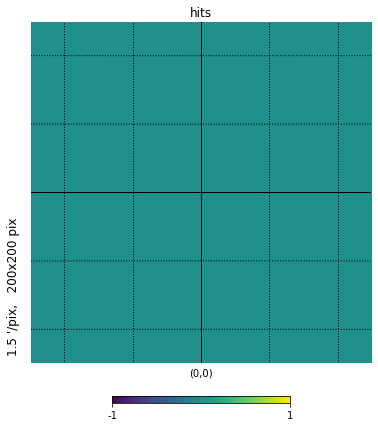

In [46]:
#hp.mollview(hitmap,coord='G')
#hp.mollview(hitmap[2000:2300], title="hits")
hp.gnomview(hitmap, title="hits") #taking in default, need to look at what it is defined in helpy, 
##check how helpy reads in pixelization, and how to do conversions to RA and DEC (function that converts pixelization)
#ask on stack exchange (last resort) 
#hp.graticule()
#hp.cartview(hitmap[750:850])

hp.graticule()

In [7]:
theta,phi = np.degrees(hp.pix2ang(nside=1024,ipix=[n]))

In [8]:
theta
np.shape(theta)
x=theta.flatten()

In [9]:
phi
np.shape(phi)
y=phi.flatten()

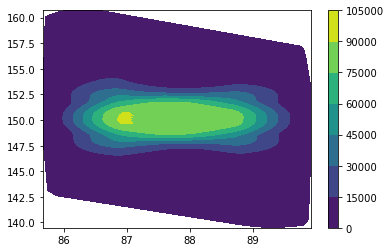

In [10]:
Arrayplt=plt.tricontourf(x,y,z)
plt.colorbar(Arrayplt)
#plt.savefig('Arrayplt')
#turn it into grid of data
#mask nonexistant points with zeros 

In [11]:
##use Linear interpolation and give it an x,y,z, it can plot down a grid 

In [12]:
#trying linear interpolation


In [13]:
np.shape(x)

(21520,)

In [14]:
np.shape(y)

(21520,)

In [15]:
np.shape(z)

(21520,)

In [16]:
#takes a while to run 
f=interp2d(x,y,z)

In [17]:
f(87,150)

array([91050.61012837])

In [18]:
num=1000

In [19]:
thetarray=np.linspace(x.min(),x.max(),num)
print(thetarray)
phiarray=np.linspace(y.min(),y.max(),num)
print(phiarray)


[85.66885127 85.67311207 85.67737288 85.68163369 85.68589449 85.6901553
 85.6944161  85.69867691 85.70293771 85.70719852 85.71145933 85.71572013
 85.71998094 85.72424174 85.72850255 85.73276335 85.73702416 85.74128497
 85.74554577 85.74980658 85.75406738 85.75832819 85.76258899 85.7668498
 85.7711106  85.77537141 85.77963222 85.78389302 85.78815383 85.79241463
 85.79667544 85.80093624 85.80519705 85.80945786 85.81371866 85.81797947
 85.82224027 85.82650108 85.83076188 85.83502269 85.83928349 85.8435443
 85.84780511 85.85206591 85.85632672 85.86058752 85.86484833 85.86910913
 85.87336994 85.87763075 85.88189155 85.88615236 85.89041316 85.89467397
 85.89893477 85.90319558 85.90745638 85.91171719 85.915978   85.9202388
 85.92449961 85.92876041 85.93302122 85.93728202 85.94154283 85.94580364
 85.95006444 85.95432525 85.95858605 85.96284686 85.96710766 85.97136847
 85.97562927 85.97989008 85.98415089 85.98841169 85.9926725  85.9969333
 86.00119411 86.00545491 86.00971572 86.01397653 86.0182

In [20]:
hit_array=f(thetarray,phiarray)
print(hit_array)
np.shape(hit_array)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.60138592e-02
  -1.26339730e-02  7.45913302e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.31197991e-02
  -5.40530889e-03  2.30918131e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.25738945e-04
   1.82335518e-03  3.87244931e-03]
 ...
 [ 5.31816073e-01  3.15612943e+01  6.25907726e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.65908037e-01  3.27888952e+01  6.53118823e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.40164960e+01  6.80329920e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


(1000, 1000)

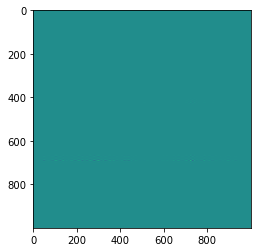

In [21]:
#plt.tricontourf(thetarray,phiarray,hit_array.flatten())
imshow(hit_array)

In [22]:
#for collection in Arrayplt.collections:
 #   for path in collection.get_paths():
  #      print(path)

In [23]:
#print(Arrayplt)

In [24]:
#hp.gnomview(hitmap,nest=True)
#hp.gnomview(hitmap)
#hp.gnomview(hitmap, rot=[theta,phi], title="GnomView", coord='G')    #unit="mK")

In [25]:
print(np.min(hitmap))

print(np.max(hitmap))


0
91120


In [26]:
mask = (hitmap > 2.054) & (hitmap < 2.056)

In [27]:
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)

In [28]:
glons, glats = hp.pix2ang(nside, np.arange(npix), lonlat=True)

In [29]:
glons_eff = glons[mask]
glats_eff = glats[mask]

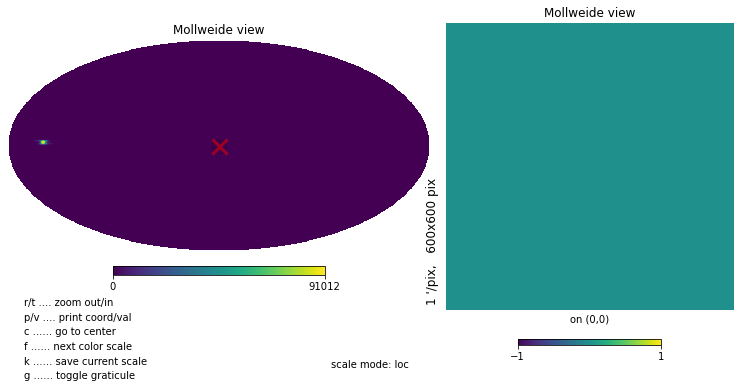

In [42]:
#use this with spyder 
hp.mollzoom(hitmap)
#plt.savefig('save')
#hp.mollzoom(map=hitmap, fig=None, rot=None, coord='G', unit='', 
 #       xsize=200, title='Mollweide view', nest=False, min=9000, max=91012, flip='astro', 
  #          remove_dip=False, remove_mono=False, gal_cut=0, format='%g', cmap=None, norm=None,
   #         hold=False, margins=None, sub=None)

In [31]:
h=HEALPix(nside=1024)# order='nested')
h

In [32]:
h.npix

12582912

In [33]:
h.pixel_area  

<Quantity 9.98685409e-07 sr>

In [34]:
lon, lat = h.healpix_to_lonlat(nside=1024)  

TypeError: healpix_to_lonlat() got an unexpected keyword argument 'nside'

In [ ]:
lon

In [ ]:
lat